# Exercise Sheet 3

## Exercise 8 

Simulate a fair dice Xi ∼ U(1, 2, 3, 4, 5, 6) and generate a frequency distribution (histogram) and the empirical CDFs of a reasonable realisation of the random variable 

$$
S_n=\displaystyle\sum_{i_1}^n \frac{X_i - E[X_i]}{\sqrt{n \cdot V[X_i]}} , n = 1, 2, 3, 5, 10, 20, 50, 100
$$




Hereby E[Xi] = 3.5 and V [Xi] = 2.9167 the expectation and variance for one roll of
the dice. The distribution of $S_n$ approximates more and more a normal distribution
N . Through standardization (subtract the expectation value, divide by the square
root of n times the variance) $S_n$ equalizes to N (0, 1) (plot N (0, 1) as an overlay into
the histograms). What fundamental mathematical theorem is behind all this?

### Mit exp. Verteilung

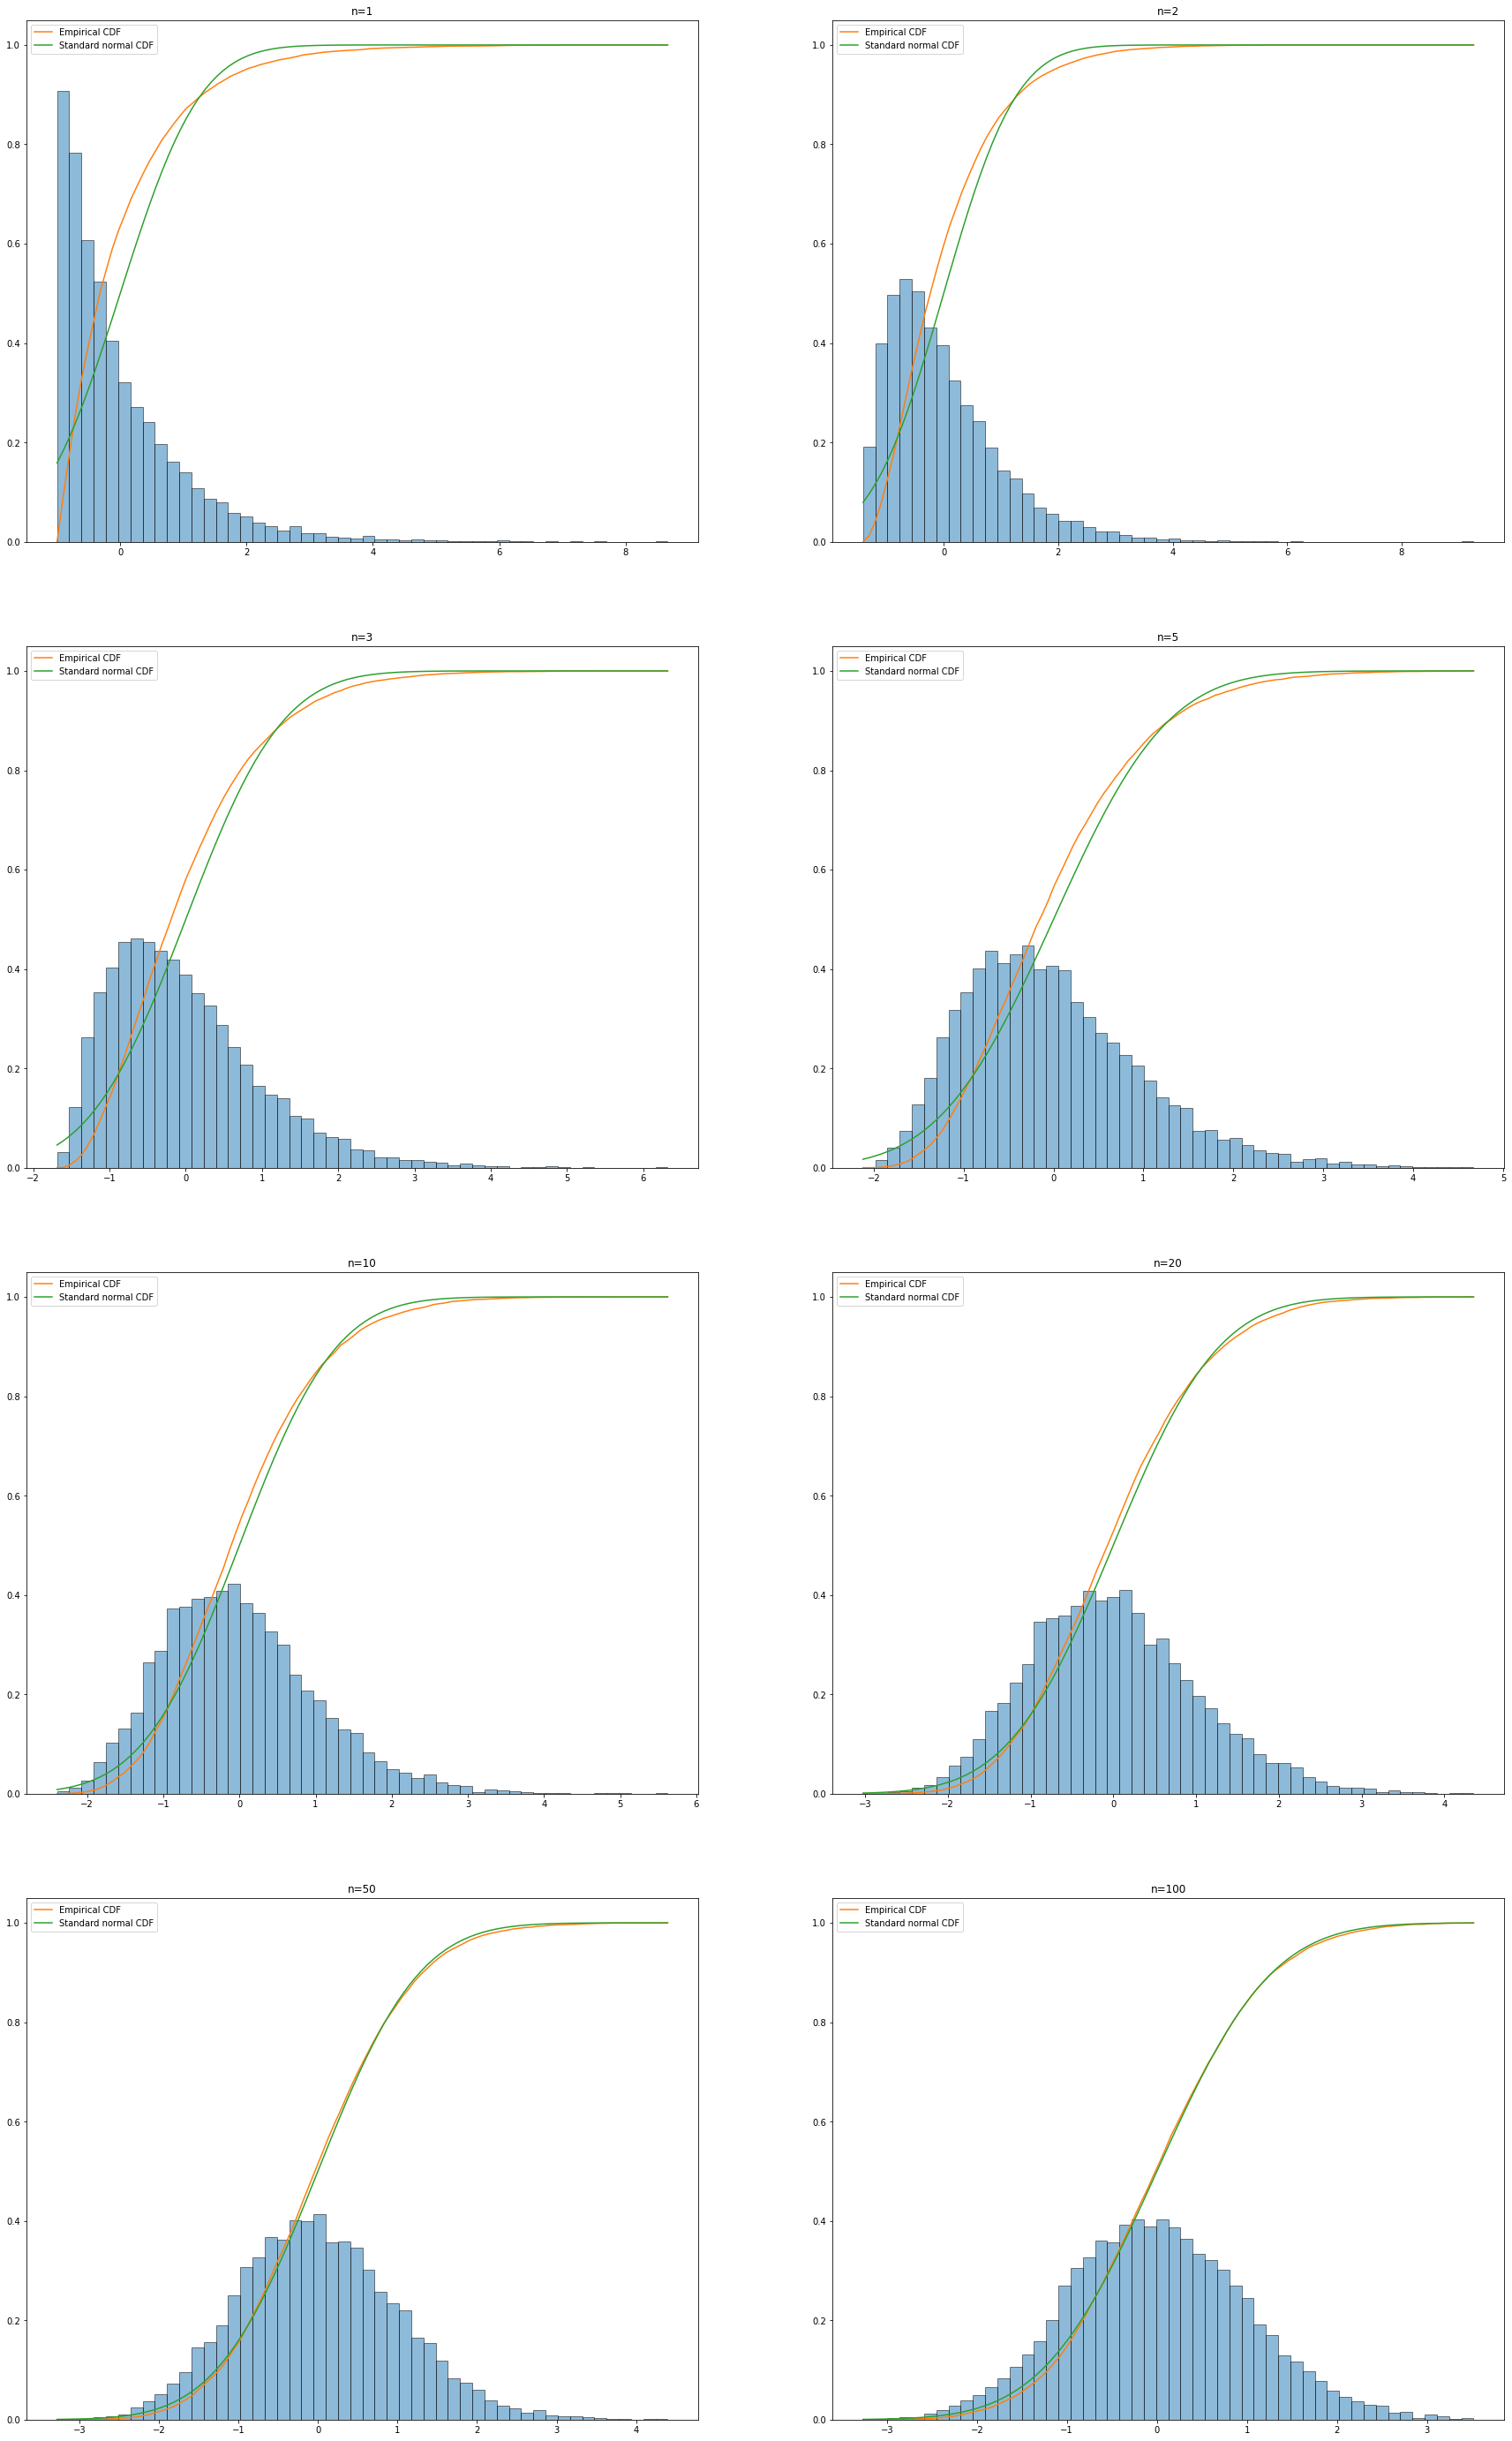

In [32]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

def simulate_sn(n, num_samples=10000):
    # Simulate n rolls of a fair dice
    rolls = np.random.exponential(1/3,size=(num_samples,n)) 

    # Compute Sn
    Sn = np.sum((rolls - 1/3) / np.sqrt(1/9), axis=1) / np.sqrt(n)
    return Sn

# Values of n to simulate
n_values = [1, 2, 3, 5, 10, 20, 50, 100]
fig, ax = plt.subplots(int(len(n_values)/2),2)
fig.set_figwidth(30)
fig.set_figheight(50)
row=0;column=0
# Simulate and plot the distributions
for i, n in enumerate(n_values):
    row = row+1 if column == 1 else row
    column = i % 2

    # Simulate Sn for the current value of n
    Sn = simulate_sn(n)
    
    # Plot the frequency distribution
    ax[row,column].hist(Sn, bins=50, density=True, edgecolor='black', alpha=0.5)

    # Plot the empirical CDF
    ecdf = ECDF(Sn)
    x = np.linspace(np.min(Sn), np.max(Sn), num=100)
    ax[row,column].plot(x, ecdf(x), label='Empirical CDF')

    # Plot the standard normal distribution
    ax[row,column].plot(x, norm.cdf(x, loc=0, scale=1), label='Standard normal CDF')

    ax[row,column].set_title(f'n={n}')
    ax[row,column].legend()



### Mit Normalverteilung

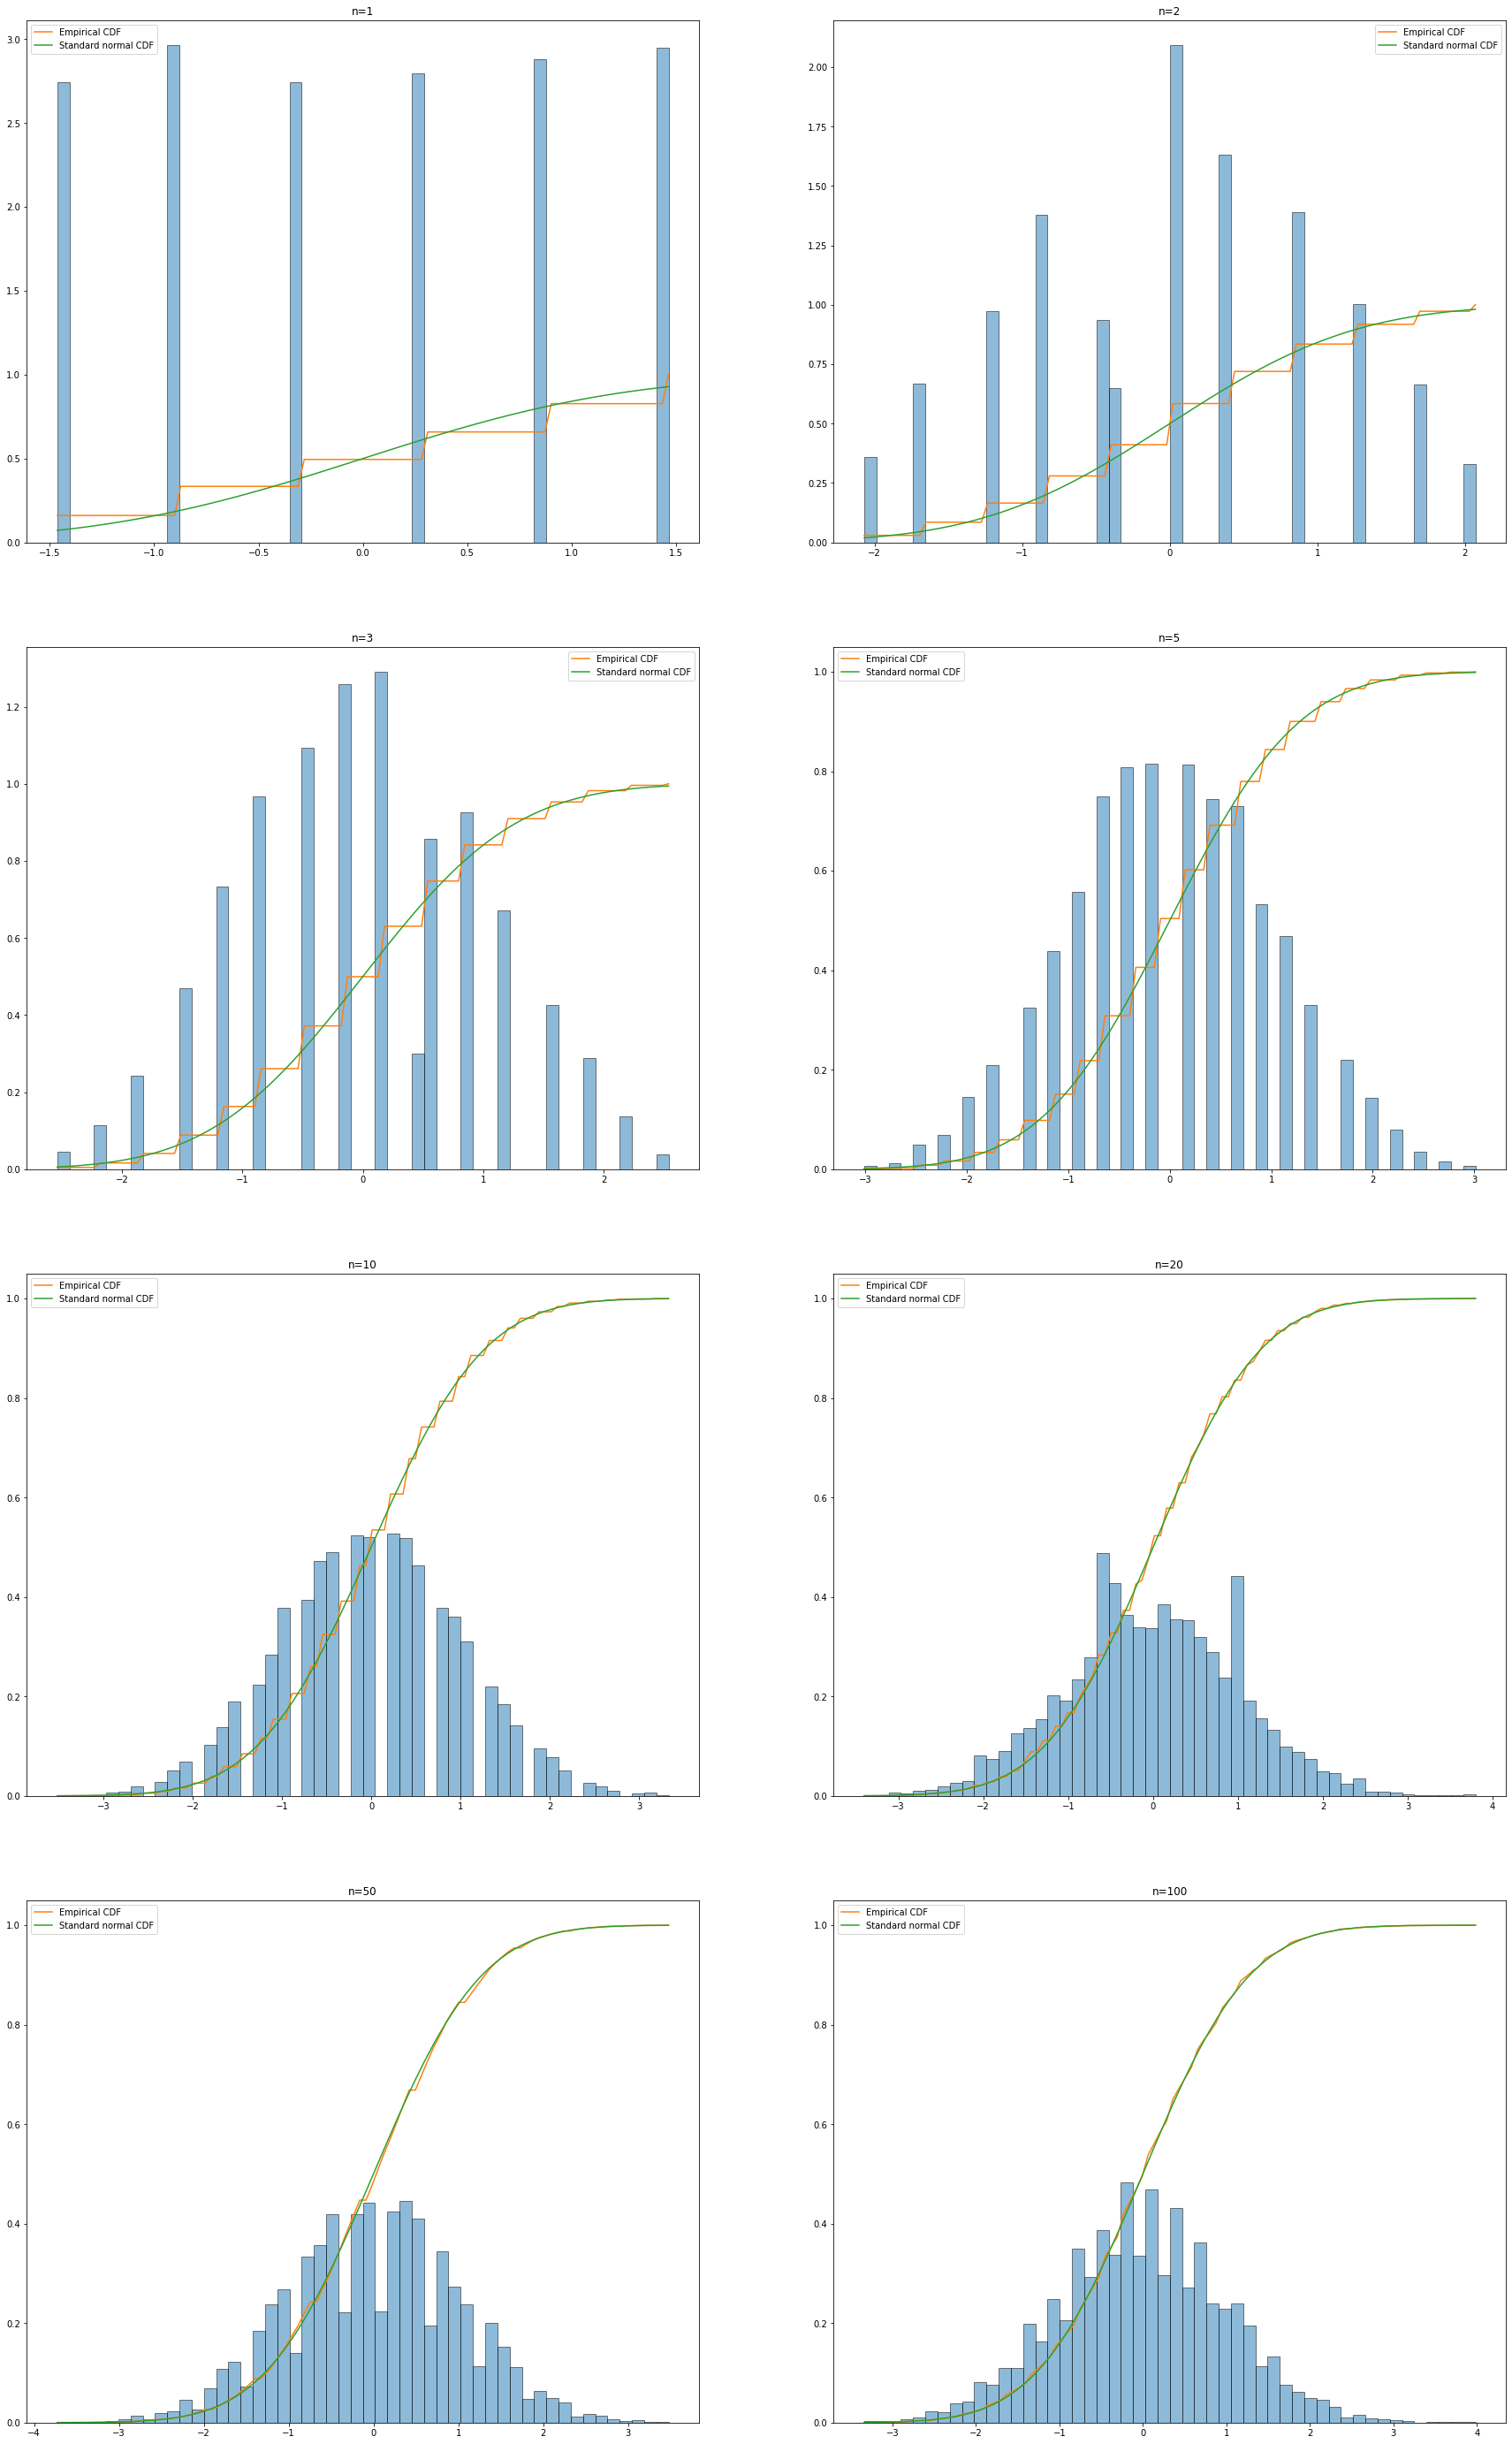

In [33]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

def simulate_sn(n, num_samples=10000):
    # Simulate n rolls of a fair dice
    rolls = np.floor(np.random.uniform(low=1, high=7, size=(num_samples, n)))

    # Compute Sn
    Sn = np.sum((rolls - 3.5) / np.sqrt(2.9167), axis=1) / np.sqrt(n)
    return Sn

# Values of n to simulate
n_values = [1, 2, 3, 5, 10, 20, 50, 100]
fig, ax = plt.subplots(int(len(n_values)/2),2)
fig.set_figwidth(30)
fig.set_figheight(50)
row=0;column=0
# Simulate and plot the distributions
for i, n in enumerate(n_values):
    row = row+1 if column == 1 else row
    column = i % 2

    # Simulate Sn for the current value of n
    Sn = simulate_sn(n)
    
    # Plot the frequency distribution
    ax[row,column].hist(Sn, bins=50, density=True, edgecolor='black', alpha=0.5)

    # Plot the empirical CDF
    ecdf = ECDF(Sn)
    x = np.linspace(np.min(Sn), np.max(Sn), num=100)
    ax[row,column].plot(x, ecdf(x), label='Empirical CDF')

    # Plot the standard normal distribution
    ax[row,column].plot(x, norm.cdf(x, loc=0, scale=1), label='Standard normal CDF')

    ax[row,column].set_title(f'n={n}')
    ax[row,column].legend()



### Statement: Egal welche Verteilung gewählt wird, mit >>n wird es immer zu einer Normalverteilung